# PPI Network Retrieval and Analysis

In [1]:
import requests
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
scamps = ['SCAMP1', 'SCAMP2', 'SCAMP3', 'SCAMP4', 'SCAMP5']
interactor_ids = []

In [3]:
for protein in scamps:
    response = requests.get(f"https://string-db.org/api/json/network?identifier={protein}&species=9606")
    data = response.json()
    for interaction in data:
        interactor_ids.append((interaction['preferredName_A'], interaction['preferredName_B'], interaction['score']))

In [4]:
print(f"Number of PPI's pulled from STRING DB: {len(interactor_ids)}")

Number of PPI's pulled from STRING DB: 94


In [5]:
ppi_table = pd.DataFrame(interactor_ids, columns=('Interactor_A', 'Interactor_B', 'Confidence Score'))
ppi_table

,Interactor_A,Interactor_B,Confidence Score
0,SYPL1,SCAMP1,0.657
1,SNAP23,ARF6,0.411
2,SNAP23,SCAMP2,0.501
3,SNAP23,SCAMP1,0.519
4,SNAP23,RAB5A,0.538
...,...,...,...
89,SCAMP5,APBA2,0.490
90,SCAMP5,SV2A,0.498
91,SCAMP5,CLK3,0.512
92,SV2A,APBA2,0.425


In [6]:
ppi_graph = nx.Graph()
for node_a, node_b, score in interactor_ids:
    ppi_graph.add_edge(node_a, node_b, weight = score)

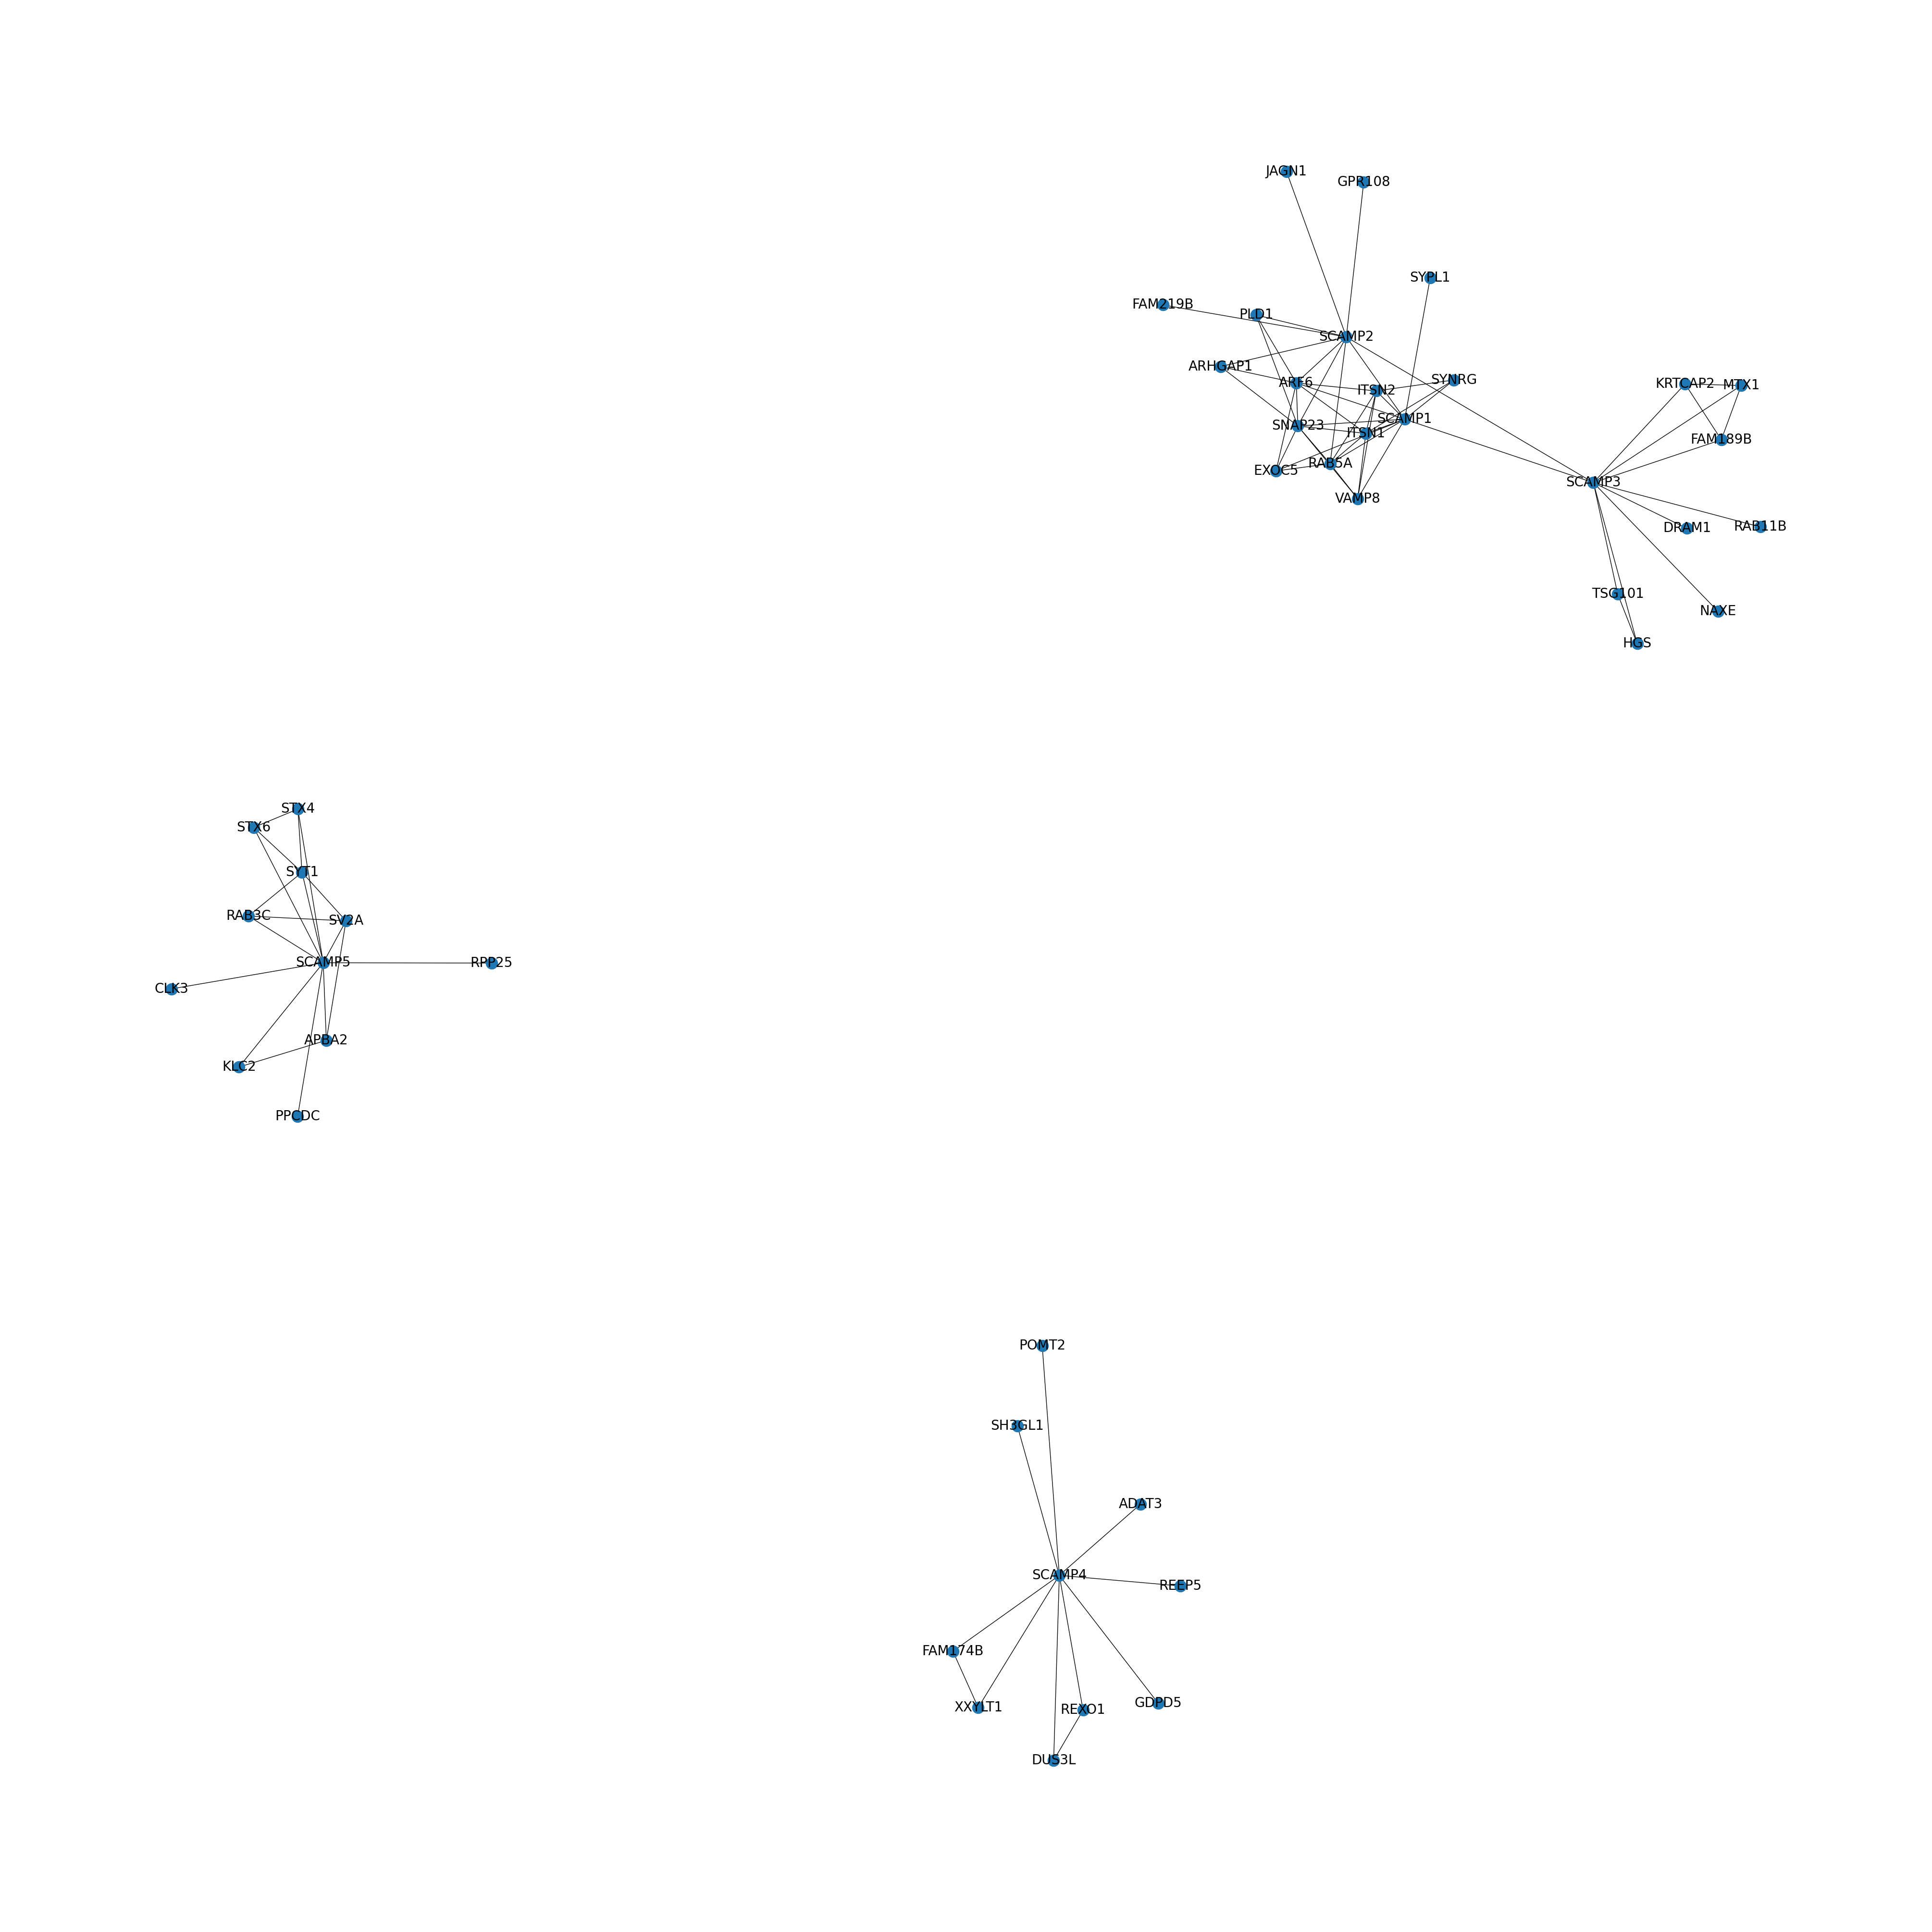

In [7]:
plt.figure(figsize=(40,40))
nx.draw(ppi_graph, with_labels = True, font_size = 20)

Reflects the likelihood of interaction *in vivo* 

In [8]:
from networkx.algorithms.community import greedy_modularity_communities

clusters = list(greedy_modularity_communities(ppi_graph))
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {sorted(cluster)}")

Cluster 1: ['ARF6', 'ARHGAP1', 'EXOC5', 'FAM219B', 'GPR108', 'ITSN1', 'ITSN2', 'JAGN1', 'PLD1', 'RAB5A', 'SCAMP1', 'SCAMP2', 'SNAP23', 'SYNRG', 'SYPL1', 'VAMP8']
Cluster 2: ['APBA2', 'CLK3', 'KLC2', 'PPCDC', 'RAB3C', 'RPP25', 'SCAMP5', 'STX4', 'STX6', 'SV2A', 'SYT1']
Cluster 3: ['ADAT3', 'DUS3L', 'FAM174B', 'GDPD5', 'POMT2', 'REEP5', 'REXO1', 'SCAMP4', 'SH3GL1', 'XXYLT1']
Cluster 4: ['DRAM1', 'FAM189B', 'HGS', 'KRTCAP2', 'MTX1', 'NAXE', 'RAB11B', 'SCAMP3', 'TSG101']


In [9]:
for i, cluster in enumerate(clusters):
    with open(f"cluster_{i+1}.txt", "w") as file:
        for protein in cluster:
            file.write(protein + "\n")

# Gene set Enrichment Analysis

## Cluster 1

In [10]:
with open("cluster_1.txt", 'r') as clus1_f:
    c1 = [protein.replace("\n", '') for protein in clus1_f.readlines()]

In [11]:
c1

['SYNRG',
 'JAGN1',
 'SCAMP2',
 'ITSN1',
 'FAM219B',
 'PLD1',
 'ARF6',
 'SYPL1',
 'VAMP8',
 'RAB5A',
 'SCAMP1',
 'ARHGAP1',
 'EXOC5',
 'ITSN2',
 'SNAP23',
 'GPR108']

In [12]:
import gseapy as gp

enr = gp.enrichr(gene_list=c1, gene_sets='KEGG_2021_Human', organism='Human')

c1_gsea_results = enr.results

In [13]:
c1_gsea_results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,SNARE interactions in vesicular transport,2/33,0.000312,0.006617,0,0,91.949309,742.186161,VAMP8;SNAP23
1,KEGG_2021_Human,Ras signaling pathway,3/232,0.000772,0.006617,0,0,19.907625,142.676705,PLD1;RAB5A;ARF6
2,KEGG_2021_Human,Salmonella infection,3/249,0.000947,0.006617,0,0,18.515947,128.911811,EXOC5;RAB5A;ARF6
3,KEGG_2021_Human,Endocytosis,3/252,0.000980,0.006617,0,0,18.290083,126.706322,PLD1;RAB5A;ARF6
4,KEGG_2021_Human,Fc gamma R-mediated phagocytosis,2/97,0.002673,0.014432,0,0,29.908271,177.197396,PLD1;ARF6
5,KEGG_2021_Human,Platelet activation,2/124,0.004323,0.019452,0,0,23.257611,126.611204,VAMP8;SNAP23
6,KEGG_2021_Human,Phospholipase D signaling pathway,2/148,0.006098,0.023520,0,0,19.410959,98.993011,PLD1;ARF6
7,KEGG_2021_Human,Vasopressin-regulated water reabsorption,1/44,0.034638,0.115506,0,0,30.916279,103.965655,RAB5A
8,KEGG_2021_Human,Ether lipid metabolism,1/49,0.038502,0.115506,0,0,27.688889,90.184078,PLD1
9,KEGG_2021_Human,Pancreatic cancer,1/76,0.059119,0.144688,0,0,17.696889,50.050441,PLD1


In [14]:
c1_gsea_results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,SNARE interactions in vesicular transport,2/33,0.000312,0.006617,0,0,91.949309,742.186161,VAMP8;SNAP23
1,KEGG_2021_Human,Ras signaling pathway,3/232,0.000772,0.006617,0,0,19.907625,142.676705,PLD1;RAB5A;ARF6
2,KEGG_2021_Human,Salmonella infection,3/249,0.000947,0.006617,0,0,18.515947,128.911811,EXOC5;RAB5A;ARF6
3,KEGG_2021_Human,Endocytosis,3/252,0.000980,0.006617,0,0,18.290083,126.706322,PLD1;RAB5A;ARF6
4,KEGG_2021_Human,Fc gamma R-mediated phagocytosis,2/97,0.002673,0.014432,0,0,29.908271,177.197396,PLD1;ARF6
5,KEGG_2021_Human,Platelet activation,2/124,0.004323,0.019452,0,0,23.257611,126.611204,VAMP8;SNAP23
6,KEGG_2021_Human,Phospholipase D signaling pathway,2/148,0.006098,0.023520,0,0,19.410959,98.993011,PLD1;ARF6
7,KEGG_2021_Human,Vasopressin-regulated water reabsorption,1/44,0.034638,0.115506,0,0,30.916279,103.965655,RAB5A
8,KEGG_2021_Human,Ether lipid metabolism,1/49,0.038502,0.115506,0,0,27.688889,90.184078,PLD1
9,KEGG_2021_Human,Pancreatic cancer,1/76,0.059119,0.144688,0,0,17.696889,50.050441,PLD1


## Cluster 2

In [15]:
with open("cluster_2.txt", 'r') as clus2_f:
    c2 = [protein.replace("\n", '') for protein in clus2_f.readlines()]
    
c2

['RPP25',
 'APBA2',
 'SYT1',
 'SV2A',
 'SCAMP5',
 'PPCDC',
 'KLC2',
 'CLK3',
 'STX6',
 'STX4',
 'RAB3C']

In [16]:
enr2 = gp.enrichr(gene_list=c2, gene_sets='KEGG_2021_Human', organism='Human')

c2_gsea_results = enr2.results

In [17]:
c2_gsea_results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,SNARE interactions in vesicular transport,2/33,0.000144,0.002014,0,0,143.068100,1265.678904,STX6;STX4
1,KEGG_2021_Human,Pantothenate and CoA biosynthesis,1/21,0.011492,0.080446,0,0,99.845000,445.915563,PPCDC
2,KEGG_2021_Human,Vasopressin-regulated water reabsorption,1/44,0.023941,0.111726,0,0,46.386047,173.119691,STX4
3,KEGG_2021_Human,Synaptic vesicle cycle,1/78,0.042083,0.132609,0,0,25.859740,81.926379,SYT1
4,KEGG_2021_Human,ECM-receptor interaction,1/88,0.047360,0.132609,0,0,22.875862,69.770627,SV2A
5,KEGG_2021_Human,Ribosome biogenesis in eukaryotes,1/108,0.057836,0.134950,0,0,18.581308,52.959492,RPP25
6,KEGG_2021_Human,RNA transport,1/186,0.097696,0.195393,0,0,10.704865,24.898353,RPP25
7,KEGG_2021_Human,Salmonella infection,1/249,0.128765,0.196480,0,0,7.960081,16.316283,KLC2
8,KEGG_2021_Human,Parkinson disease,1/249,0.128765,0.196480,0,0,7.960081,16.316283,KLC2
9,KEGG_2021_Human,Prion disease,1/273,0.140343,0.196480,0,0,7.248897,14.234410,KLC2


## Cluster 3

In [18]:
with open("cluster_3.txt", 'r') as clus3_f:
    c3 = [protein.replace("\n", '') for protein in clus3_f.readlines()]

enr3 = gp.enrichr(gene_list=c3, gene_sets='KEGG_2021_Human', organism='Human')

c3_gsea_results = enr3.results
c3_gsea_results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Other types of O-glycan biosynthesis,2/47,0.000240,0.000961,0,0,110.805556,923.399314,POMT2;XXYLT1
1,KEGG_2021_Human,Mannose type O-glycan biosynthesis,1/23,0.011443,0.022886,0,0,100.848485,450.829699,POMT2
2,KEGG_2021_Human,Ribosome biogenesis in eukaryotes,1/108,0.052718,0.070290,0,0,20.646937,60.759829,REXO1
3,KEGG_2021_Human,Endocytosis,1/252,0.119116,0.119116,0,0,8.737937,18.591367,SH3GL1


## Cluster 4

In [19]:
with open("cluster_4.txt", 'r') as clus4_f:
    c4 = [protein.replace("\n", '') for protein in clus4_f.readlines()]

enr4 = gp.enrichr(gene_list=c4, gene_sets='KEGG_2021_Human', organism='Human')

c4_gsea_results = enr4.results
c4_gsea_results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Endocytosis,3/252,0.000157,0.000785,0,0,39.642570,347.245274,TSG101;HGS;RAB11B
1,KEGG_2021_Human,Vasopressin-regulated water reabsorption,1/44,0.019630,0.049076,0,0,57.988372,227.933516,RAB11B
2,KEGG_2021_Human,AMPK signaling pathway,1/120,0.052732,0.074804,0,0,20.873950,61.422268,RAB11B
3,KEGG_2021_Human,Phagosome,1/152,0.066370,0.074804,0,0,16.423841,44.549909,HGS
4,KEGG_2021_Human,Influenza A,1/172,0.074804,0.074804,0,0,14.488304,37.566422,RAB11B


In [20]:
c1_gsea_results['Cluster'] = 1
c2_gsea_results['Cluster'] = 2
c3_gsea_results['Cluster'] = 3
c4_gsea_results['Cluster'] = 4

gsea_all = pd.concat([c1_gsea_results, c2_gsea_results, c3_gsea_results, c4_gsea_results])

In [21]:
gsea_all

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Cluster
0,KEGG_2021_Human,SNARE interactions in vesicular transport,2/33,0.000312,0.006617,0,0,91.949309,742.186161,VAMP8;SNAP23,1
1,KEGG_2021_Human,Ras signaling pathway,3/232,0.000772,0.006617,0,0,19.907625,142.676705,PLD1;RAB5A;ARF6,1
2,KEGG_2021_Human,Salmonella infection,3/249,0.000947,0.006617,0,0,18.515947,128.911811,EXOC5;RAB5A;ARF6,1
3,KEGG_2021_Human,Endocytosis,3/252,0.000980,0.006617,0,0,18.290083,126.706322,PLD1;RAB5A;ARF6,1
4,KEGG_2021_Human,Fc gamma R-mediated phagocytosis,2/97,0.002673,0.014432,0,0,29.908271,177.197396,PLD1;ARF6,1
5,KEGG_2021_Human,Platelet activation,2/124,0.004323,0.019452,0,0,23.257611,126.611204,VAMP8;SNAP23,1
6,KEGG_2021_Human,Phospholipase D signaling pathway,2/148,0.006098,0.023520,0,0,19.410959,98.993011,PLD1;ARF6,1
7,KEGG_2021_Human,Vasopressin-regulated water reabsorption,1/44,0.034638,0.115506,0,0,30.916279,103.965655,RAB5A,1
8,KEGG_2021_Human,Ether lipid metabolism,1/49,0.038502,0.115506,0,0,27.688889,90.184078,PLD1,1
9,KEGG_2021_Human,Pancreatic cancer,1/76,0.059119,0.144688,0,0,17.696889,50.050441,PLD1,1


In [22]:
gsea_all.to_csv('scamp_ppi_gsea.csv', index = False)

In [23]:
gsea_toplot = pd.read_csv('scamp_ppi_gsea.csv')
signifigant = gsea_toplot[gsea_toplot['Adjusted P-value'] <= 0.10]
signifigant

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Cluster
0,KEGG_2021_Human,SNARE interactions in vesicular transport,2/33,0.000312,0.006617,0,0,91.949309,742.186161,VAMP8;SNAP23,1
1,KEGG_2021_Human,Ras signaling pathway,3/232,0.000772,0.006617,0,0,19.907625,142.676705,PLD1;RAB5A;ARF6,1
2,KEGG_2021_Human,Salmonella infection,3/249,0.000947,0.006617,0,0,18.515947,128.911811,EXOC5;RAB5A;ARF6,1
3,KEGG_2021_Human,Endocytosis,3/252,0.000980,0.006617,0,0,18.290083,126.706322,PLD1;RAB5A;ARF6,1
4,KEGG_2021_Human,Fc gamma R-mediated phagocytosis,2/97,0.002673,0.014432,0,0,29.908271,177.197396,PLD1;ARF6,1
5,KEGG_2021_Human,Platelet activation,2/124,0.004323,0.019452,0,0,23.257611,126.611204,VAMP8;SNAP23,1
6,KEGG_2021_Human,Phospholipase D signaling pathway,2/148,0.006098,0.023520,0,0,19.410959,98.993011,PLD1;ARF6,1
27,KEGG_2021_Human,SNARE interactions in vesicular transport,2/33,0.000144,0.002014,0,0,143.068100,1265.678904,STX6;STX4,2
28,KEGG_2021_Human,Pantothenate and CoA biosynthesis,1/21,0.011492,0.080446,0,0,99.845000,445.915563,PPCDC,2
41,KEGG_2021_Human,Other types of O-glycan biosynthesis,2/47,0.000240,0.000961,0,0,110.805556,923.399314,POMT2;XXYLT1,3


/var/folders/vz/ggcbdp195vb6bwjd2hw6yfsc0000gn/T/ipykernel_2427/3173719336.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = top_path['Term'], x = -np.log10(top_path['Adjusted P-value']), palette='viridis')


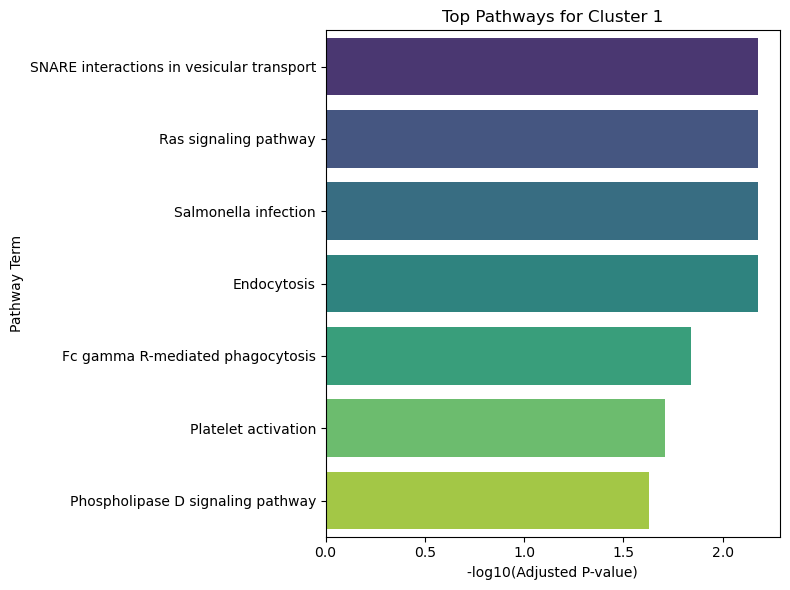

/var/folders/vz/ggcbdp195vb6bwjd2hw6yfsc0000gn/T/ipykernel_2427/3173719336.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = top_path['Term'], x = -np.log10(top_path['Adjusted P-value']), palette='viridis')


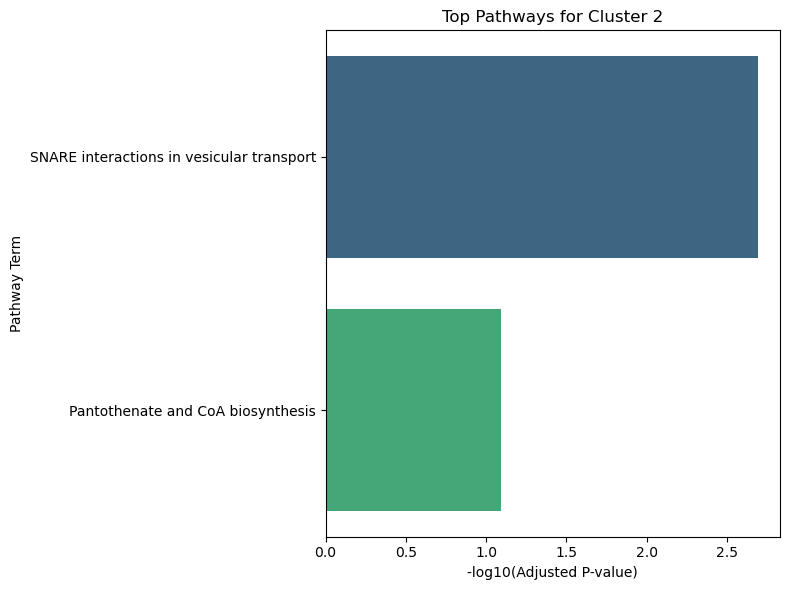

/var/folders/vz/ggcbdp195vb6bwjd2hw6yfsc0000gn/T/ipykernel_2427/3173719336.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = top_path['Term'], x = -np.log10(top_path['Adjusted P-value']), palette='viridis')


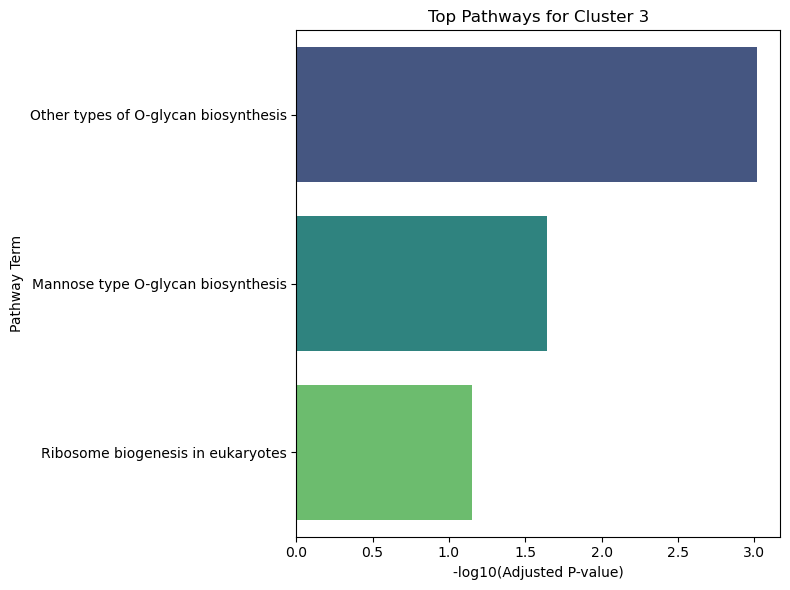

/var/folders/vz/ggcbdp195vb6bwjd2hw6yfsc0000gn/T/ipykernel_2427/3173719336.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = top_path['Term'], x = -np.log10(top_path['Adjusted P-value']), palette='viridis')


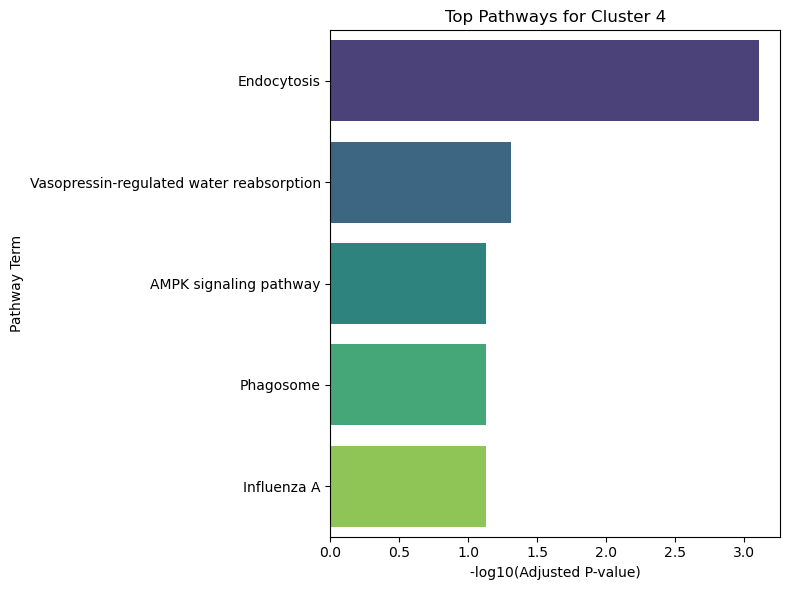

In [24]:
import numpy as np
import seaborn as sns

for cluster in signifigant['Cluster'].unique():
    cluster_data = signifigant[signifigant['Cluster'] == cluster]
    top_path = cluster_data.sort_values('Adjusted P-value')
    
    plt.figure(figsize=(8,6))
    sns.barplot(y = top_path['Term'], x = -np.log10(top_path['Adjusted P-value']), palette='viridis')
    plt.title(f'Top Pathways for Cluster {cluster}')
    plt.xlabel('-log10(Adjusted P-value)')
    plt.ylabel('Pathway Term')
    plt.tight_layout()
    plt.show()